## 0.Install and Import Dependencies


In [2]:
!pip install tensorflow stable-baselines3 gym-anytrading gym

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.7/181.7 kB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.2/172.2 kB 19.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.9/953.9 kB 29.9 MB/s eta 0:00:00


In [3]:
!pip install --upgrade --no-deps --force-reinstall https://github.com/AminHP/gym-anytrading/archive/master.zip

     \ 1.1 MB 10.9 MB/s 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for gym-anytrading: filename=gym_anytrading-2.0.0-py3-none-any.whl size=171561 sha256=11f5b0c5a22cb7e94abc3b32fbaddb48572e6a75484df3b3f5d192c2d1f7536e
  Stored in directory: /tmp/pip-ephem-wheel-cache-yzdy5ybo/wheels/ca/3f/20/f9fdccd43738c98c5e91e1d58087bf68a8a2926ca56d1ad481
Successfully built gym-anytrading
  Attempting uninstall: gym-anytrading
    Found existing installation: gym-anytrading 2.0.0
    Uninstalling gym-anytrading-2.0.0:
      Successfully uninstalled gym-anytrading-2.0.0


In [4]:

#Gym
import gymnasium as gym
import gym_anytrading

#Stable Baselines - RL Stuff
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3 import A2C
from stable_baselines3 import DQN
from stable_baselines3 import PPO
from stable_baselines3 import DDPG

#Processing Libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

##  Bring in Marketwatch GME Data
https://www.marketwatch.com/investing/stock/gme/download-data?startDate=11/11/2020&endDate=03/10/2023

In [5]:
df = pd.read_csv("/content/drive/MyDrive/Acads_7th Sem/ME 315/RL GME Custom Indicators/data.csv")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [6]:
df.sort_values('Date', ascending=True, inplace=True)
df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Date,Open,High,Low,Close,Volume
480,01-03-2022,37.31,39.85,37.30,38.21,"56,68,004"
229,01-03-2023,18.64,19.26,17.09,17.20,"51,35,191"
732,01-04-2021,4.75,4.78,4.29,4.31,"4,00,89,880"
479,01-04-2022,38.04,38.25,35.76,37.23,"73,39,576"
228,01-04-2023,17.25,17.93,16.90,17.32,"39,39,325"
...,...,...,...,...,...,...
734,12/30/2020,4.85,5.00,4.71,4.82,"2,37,37,564"
482,12/30/2021,37.75,40.00,37.50,38.83,"62,47,528"
230,12/30/2022,17.95,18.58,17.90,18.46,"26,69,548"
733,12/31/2020,4.81,4.95,4.70,4.71,"2,76,90,608"


In [7]:
df['Date'] = pd.to_datetime(df['Date'])
df.dtypes

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Date      datetime64[ns]
Open             float64
High             float64
Low              float64
Close            float64
Volume            object
dtype: object

In [8]:
#Making date as index
df.set_index("Date", inplace=True) #inplace = True means we are editing on the same dataset
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Open,High,Low,Close,Volume
Date,,,,,
2022-01-03,37.31,39.85,37.30,38.21,"56,68,004"
2023-01-03,18.64,19.26,17.09,17.20,"51,35,191"
2021-01-04,4.75,4.78,4.29,4.31,"4,00,89,880"
2022-01-04,38.04,38.25,35.76,37.23,"73,39,576"
2023-01-04,17.25,17.93,16.90,17.32,"39,39,325"


In [9]:
env = gym.make('stocks-v0', df=df, frame_bound=(5,200), window_size=5)
#frame bound minimum 5, i.e., greater than window size
#window size is the no. of sets of previous data that is inputting to the model to give out the data at tht timestamp
# i.e, 5 steps => making one decision

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [10]:
env.signal_features

/usr/local/lib/python3.10/dist-packages/gymnasium/core.py:311: UserWarning: WARN: env.signal_features to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.signal_features` for environment variables or `env.get_wrapper_attr('signal_features')` that will search the reminding wrappers.
  logger.warn(


array([[ 38.21,   0.  ],
       [ 17.2 , -21.01],
       [  4.31, -12.89],
       [ 37.23,  32.92],
       [ 17.32, -19.91],
       [  4.34, -12.98],
       [ 32.34,  28.  ],
       [ 16.22, -16.12],
       [  4.59, -11.63],
       [ 32.76,  28.17],
       [ 16.46, -16.3 ],
       [  4.52, -11.94],
       [ 35.16,  30.64],
       [  4.42, -30.74],
       [ 16.38,  11.96],
       [ 32.79,  16.41],
       [ 17.77, -15.02],
       [  4.99, -12.78],
       [ 32.58,  27.59],
       [ 19.04, -13.54],
       [  4.99, -14.05],
       [ 32.02,  27.03],
       [ 20.63, -11.39],
       [  7.85, -12.78],
       [ 30.62,  22.77],
       [ 20.49, -10.13],
       [  9.98, -10.51],
       [ 29.16,  19.18],
       [  8.88, -20.28],
       [ 21.8 ,  12.92],
       [ 27.23,   5.43],
       [ 20.79,  -6.44],
       [  9.84, -10.95],
       [ 26.64,  16.8 ],
       [ 19.04,  -7.6 ],
       [  9.78,  -9.26],
       [ 25.67,  15.89],
       [ 19.61,  -6.06],
       [ 10.76,  -8.85],
       [ 26.59,  15.83],


## 2. Build Environment

In [11]:
env.action_space

Discrete(2)

/usr/local/lib/python3.10/dist-packages/gymnasium/core.py:311: UserWarning: WARN: env.render_all to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.render_all` for environment variables or `env.get_wrapper_attr('render_all')` that will search the reminding wrappers.
  logger.warn(


info {'total_reward': 5.019989967346191, 'total_profit': 3.133806468889652, 'position': <Positions.Short: 0>}


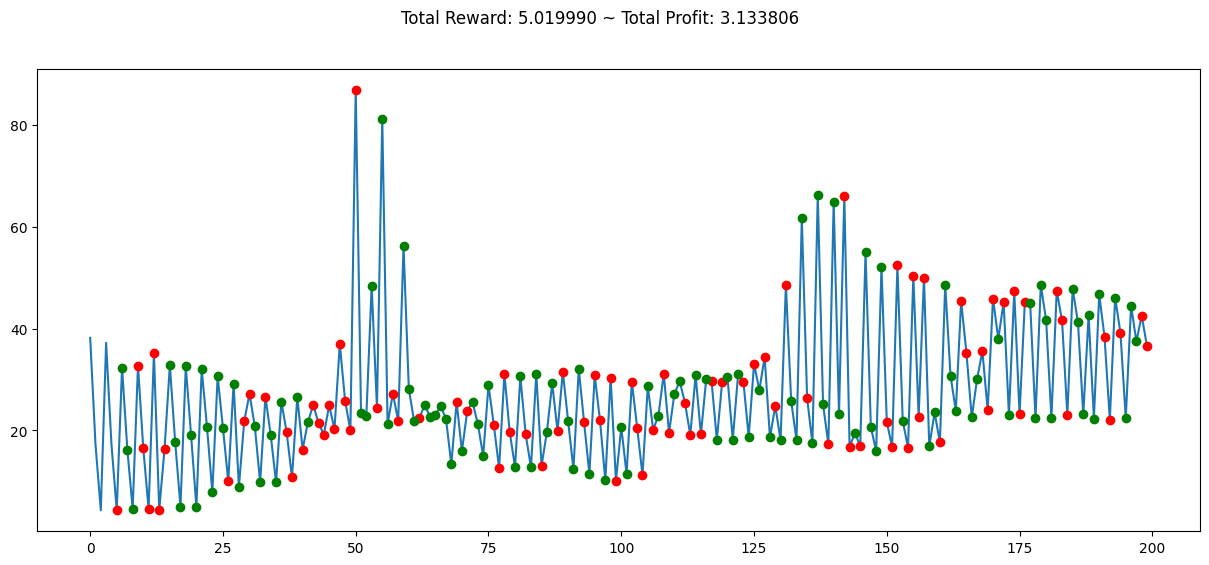

In [12]:
state = env.reset() # allows us to get initial sttae => 5 windows signal features
while True:
  action = env.action_space.sample() #sample means reandomly taking actio
  n_state, reward, done, terminated, info = env.step(action) #taking that action and getting from env
  if (done | terminated):
    print("info", info)
    break

plt.figure(figsize=(15,6))
plt.cla()
env.render_all() #allows to render all of the different trades that have hapenned
plt.show()

#### 2.1 Add Custom Indicators


In [13]:
!pip install finta

In [14]:
from gym_anytrading.envs import StocksEnv
from finta import TA

##### 2.1.2 Fix Colume Column

In [15]:

df.dtypes

Open      float64
High      float64
Low       float64
Close     float64
Volume     object
dtype: object

In [16]:
df['Volume'].unique()

array(['56,68,004', '51,35,191', '4,00,89,880', '73,39,576', '39,39,325',
       '1,98,45,828', '1,35,85,600', '60,66,158', '2,42,24,992',
       '2,42,05,920', '48,23,357', '2,45,17,104', '4,85,49,240',
       '2,59,27,840', '35,22,596', '2,20,47,924', '44,02,799',
       '5,97,10,440', '1,03,32,220', '84,05,821', '2,82,42,660',
       '62,98,036', '58,77,276', '57,80,06,812', '89,01,080', '54,94,405',
       '37,48,69,624', '1,54,01,912', '18,74,65,436', '54,07,905',
       '1,50,37,612', '56,32,161', '29,88,87,688', '96,14,316',
       '45,19,163', '13,38,87,156', '1,16,80,296', '35,64,322',
       '22,83,19,016', '2,21,20,044', '78,86,31,624', '71,81,508',
       '2,50,70,996', '23,81,588', '71,14,96,000', '1,42,97,020',
       '35,15,791', '71,43,52,000', '3,33,30,160', '35,19,973',
       '37,35,86,688', '1,46,79,824', '1,18,97,250', '23,52,63,236',
       '1,64,30,268', '20,22,64,236', '49,50,563', '1,39,97,092',
       '31,28,376', '14,95,28,608', '1,38,47,508', '45,17,191',
  

In [17]:
df['Volume'] = df['Volume'].apply(lambda x: float(x.replace(",", "")) )

In [18]:
df.dtypes

Open      float64
High      float64
Low       float64
Close     float64
Volume    float64
dtype: object

### 2.1.3 Technical Indicators

SMA : Simple moving averages calculate the average of a range of prices by the number of periods within that range.
RSI : The relative strength index (RSI) is a momentum indicator used here. RSI measures the speed and magnitude of a security's recent price changes to evaluate overvalued or undervaluedconditions in the price of that security.
OBV : On-balance volume (OBV) is a technical indicator that measures positive and negative volume flow and analyzes the trading direction

In [19]:
df['SMA'] = TA.SMA(df,12)
df['RSI'] = TA.RSI(df)
df['OBV'] = TA.OBV(df)
df['EMA'] = TA.EMA(df,5)
df['VAMA'] = TA.VAMA(df,5)
df['MOM'] = TA.MOM(df)
df['VPT'] = TA.VPT(df)
df['MSD'] = TA.MSD(df)


In [20]:
df.fillna(0,inplace=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [21]:
df.head(20)

,Open,High,Low,Close,Volume,SMA,RSI,OBV,EMA,VAMA,MOM,VPT,MSD
Date,,,,,,,,,,,,,
2022-01-03,37.31,39.85,37.30,38.21,5668004.0,0.000000,0.000000,0.0,38.210000,0.000000,0.00,4.000944e+06,0.0
2023-01-03,18.64,19.26,17.09,17.20,5135191.0,0.000000,0.000000,-5135191.0,25.604000,0.000000,0.00,-2.814425e+06,0.0
2021-01-04,4.75,4.78,4.29,4.31,40089880.0,0.000000,0.000000,-45225071.0,15.517368,0.000000,0.00,-7.481258e+07,0.0
2022-01-04,38.04,38.25,35.76,37.23,7339576.0,0.000000,52.249779,-37885495.0,24.536462,0.000000,0.00,-7.958772e+07,0.0
2023-01-04,17.25,17.93,16.90,17.32,3939325.0,0.000000,38.983220,-41824820.0,21.766161,0.000000,0.00,-7.905228e+07,0.0
2021-01-05,4.34,4.52,4.31,4.34,19845828.0,0.000000,33.085322,-61670648.0,15.398406,0.000000,0.00,-7.905228e+07,0.0
2022-01-05,37.10,37.21,32.29,32.34,13585600.0,0.000000,50.487466,-48085048.0,21.396668,0.000000,0.00,-1.053399e+08,0.0
2023-01-05,17.06,17.26,15.89,16.22,6066158.0,0.000000,43.477198,-54151206.0,19.601050,0.000000,0.00,-1.127787e+08,0.0
2021-01-06,4.34,4.75,4.33,4.59,24224992.0,0.000000,39.243516,-78376198.0,14.463733,20.971861,0.00,-8.393938e+07,0.0


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### 2.1.4 Create new Environments

In [22]:
def add_signals(env):
  start = env.frame_bound[0] - env.window_size
  end = env.frame_bound[1]
  prices = env.df.loc[:,'Low'].to_numpy()[start:end]
  signal_features = env.df.loc[:, ['Low', "Volume", "SMA", "RSI", "OBV", "EMA", "VAMA", "MOM", "VPT", "MSD"]].to_numpy()[start:end]
  return prices, signal_features

In [23]:
class MyCustomEnv(StocksEnv):
  _process_data = add_signals

env2 = MyCustomEnv(df=df, window_size=12, frame_bound=(12,50))

In [24]:
env2.prices

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([37.3 , 17.09,  4.29, 35.76, 16.9 ,  4.31, 32.29, 15.89,  4.33,
       30.29, 15.41,  4.51, 33.13,  4.27, 16.36, 30.  , 16.25,  4.75,
       31.85, 17.86,  4.83, 31.61, 18.34,  5.01, 30.42, 19.8 ,  8.26,
       28.01,  8.5 , 20.37, 26.1 , 20.5 ,  9.16, 26.1 , 18.82,  9.02,
       25.4 , 18.9 ,  9.25, 23.18, 10.58, 19.37, 21.57, 21.  , 15.28,
       23.75, 19.53, 20.05, 25.08, 19.38])

In [25]:
df.head()

,Open,High,Low,Close,Volume,SMA,RSI,OBV,EMA,VAMA,MOM,VPT,MSD
Date,,,,,,,,,,,,,
2022-01-03,37.31,39.85,37.30,38.21,5668004.0,0.0,0.000000,0.0,38.210000,0.0,0.0,4.000944e+06,0.0
2023-01-03,18.64,19.26,17.09,17.20,5135191.0,0.0,0.000000,-5135191.0,25.604000,0.0,0.0,-2.814425e+06,0.0
2021-01-04,4.75,4.78,4.29,4.31,40089880.0,0.0,0.000000,-45225071.0,15.517368,0.0,0.0,-7.481258e+07,0.0
2022-01-04,38.04,38.25,35.76,37.23,7339576.0,0.0,52.249779,-37885495.0,24.536462,0.0,0.0,-7.958772e+07,0.0
2023-01-04,17.25,17.93,16.90,17.32,3939325.0,0.0,38.983220,-41824820.0,21.766161,0.0,0.0,-7.905228e+07,0.0


In [26]:
env2.signal_features

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([[ 3.73000000e+01,  5.66800400e+06,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  3.82100000e+01,
         0.00000000e+00,  0.00000000e+00,  4.00094400e+06,
         0.00000000e+00],
       [ 1.70900000e+01,  5.13519100e+06,  0.00000000e+00,
         0.00000000e+00, -5.13519100e+06,  2.56040000e+01,
         0.00000000e+00,  0.00000000e+00, -2.81442470e+06,
         0.00000000e+00],
       [ 4.29000000e+00,  4.00898800e+07,  0.00000000e+00,
         0.00000000e+00, -4.52250710e+07,  1.55173684e+01,
         0.00000000e+00,  0.00000000e+00, -7.48125765e+07,
         0.00000000e+00],
       [ 3.57600000e+01,  7.33957600e+06,  0.00000000e+00,
         5.22497791e+01, -3.78854950e+07,  2.45364615e+01,
         0.00000000e+00,  0.00000000e+00, -7.95877224e+07,
         0.00000000e+00],
       [ 1.69000000e+01,  3.93932500e+06,  0.00000000e+00,
         3.89832203e+01, -4.18248200e+07,  2.17661611e+01,
         0.00000000e+00,  0.00000000e+00, -7.90522801e+07,
         0.

## 3. Build Environment and Train

In [27]:
env_maker = lambda: env2
env = DummyVecEnv([env_maker]) #wrapper

In [28]:
model = A2C('MlpPolicy', env, verbose=1)
model.learn(total_timesteps=10000)

Using cpu device
------------------------------------
| time/                 |          |
|    fps                | 611      |
|    iterations         | 100      |
|    time_elapsed       | 0        |
|    total_timesteps    | 500      |
| train/                |          |
|    entropy_loss       | -0.682   |
|    explained_variance | 0.13     |
|    learning_rate      | 0.0007   |
|    n_updates          | 99       |
|    policy_loss        | 7.42     |
|    value_loss         | 304      |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 655      |
|    iterations         | 200      |
|    time_elapsed       | 1        |
|    total_timesteps    | 1000     |
| train/                |          |
|    entropy_loss       | -0.666   |
|    explained_variance | 0.489    |
|    learning_rate      | 0.0007   |
|    n_updates          | 199      |
|    policy_loss        | 7.03     |
|    value_loss      

### 4. Evaluation

In [ ]:
env = MyCustomEnv(df=df, window_size=12, frame_bound=(90,150))
obs = env.reset()
obs = np.asarray(obs, dtype='object')
temp_obs = obs[0]
#print(len(obs))

while True:
  temp_obs = temp_obs[np.newaxis,...]
  action, _states = model.predict(temp_obs)
  temp_obs, rewards, done, terminated, info = env.step(action)

  if done | terminated:
    print("info", info)
    break


info {'total_reward': 22.839999999999993, 'total_profit': 2.540338124754893, 'position': <Positions.Long: 1>}


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


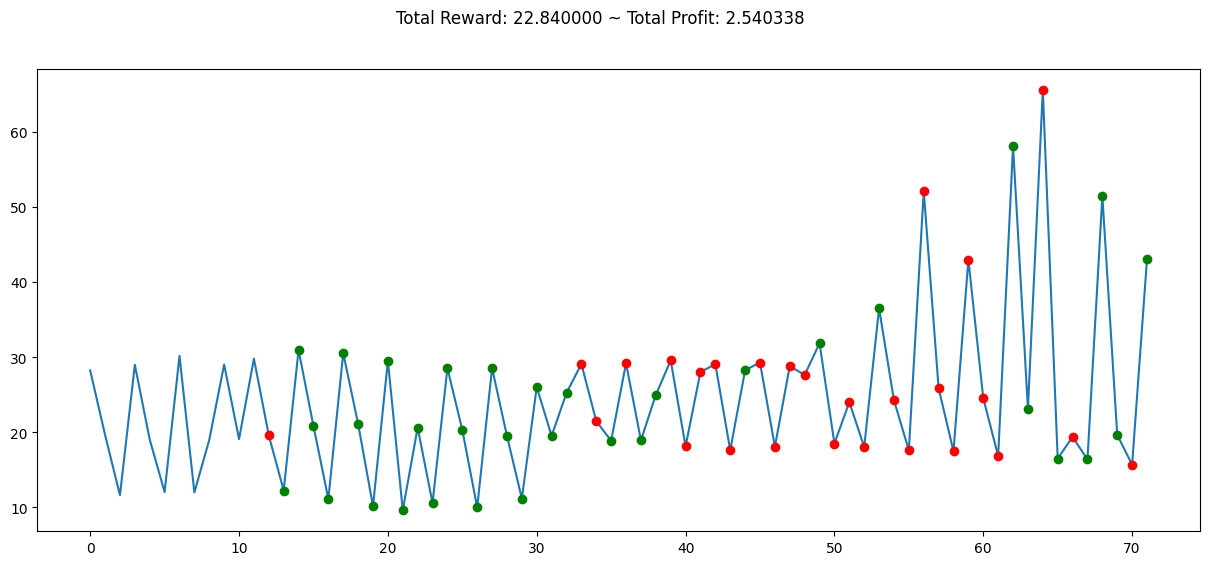

In [77]:

plt.figure(figsize=(15,6))
plt.cla()
env.unwrapped.render_all() #allows to render all of the different trades that have hapenned
plt.show()